In [13]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
%autosave 1

Autosaving every 1 seconds


In [15]:
# importing Data
df = pd.read_csv('/content/Customer-Churn-Records.csv')

# read the first 5 data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [16]:
# reading the last 5 data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [17]:
# importing Library for clasification
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

In [18]:
# check number of rows and columns
print('Number of rows:', df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 10000
Number of columns: 18


In [19]:
# Data Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### **EXPLORATORY DATA ANALYSIS**

In [20]:
# deskriptive analysis
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


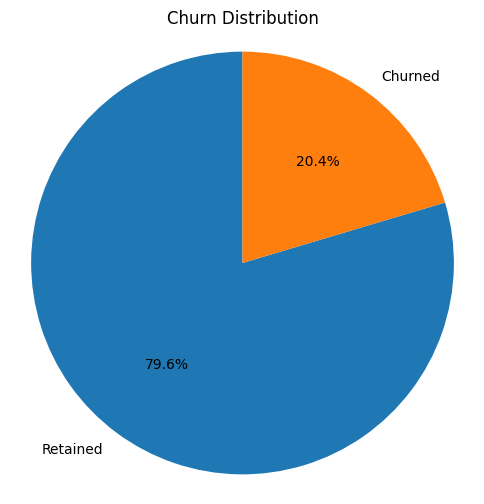

In [21]:
# How much customers Churned and Retained?
plt.figure(figsize=(6, 6))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()


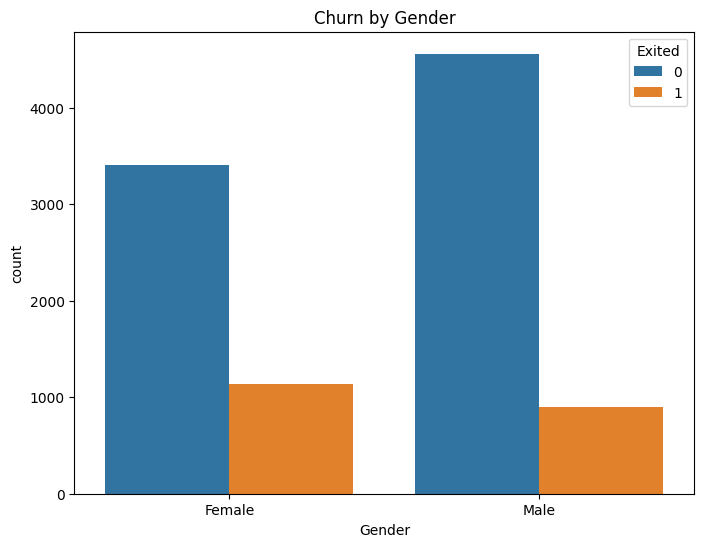

In [22]:
# Churn based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x ='Gender', hue='Exited', data= df)
plt.title('Churn by Gender')
plt.show()

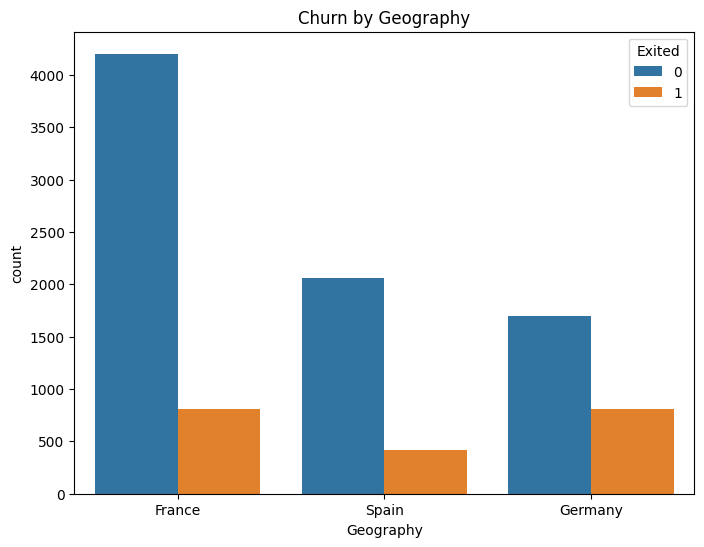

In [23]:
# Churn by geography
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

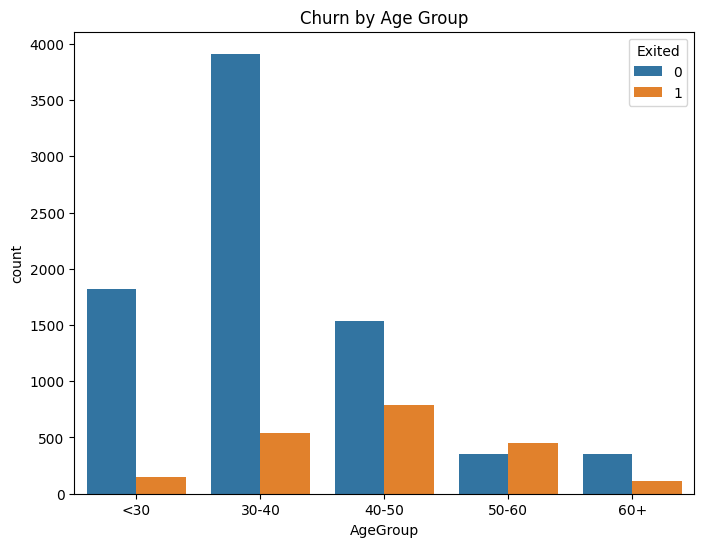

In [24]:
# Churn by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Group')
plt.show()

## **Insights**

In [25]:
# Churn rate by gender
churn_rate_gender = df.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


Based on the information above, the turnover rate based on gender is as follows: Females: 25.1% Males: 16.5% This means that the turnover rate for female customers is higher compared to males.

In [26]:
churn_rate_geography = df.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


Based on the dataset, the turnover rates based on geography are as follows:

France: 16.2%
Germany: 32.4%
Spain: 16.7%

This means that the highest turnover rate is in Germany at 32.4%, followed by Spain at 16.7%, and France at 16.2%.

In [27]:
# Churn rate by age group
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean()
print(churn_rate_age)

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
60+      0.247845
Name: Exited, dtype: float64


Based on the provided dataset, the churn rate by age group is as follows:

<30: 7.5%

30-40: 12.1%

40-50: 33.9%

50-60: 56.2%

60+: 24.8%

These churn rates indicate that the highest churn rate is observed in the 50-60 age group (56.2%), followed by the 40-50 age group (33.9%). The lowest churn rate is observed in the <30 age group (7.5%).

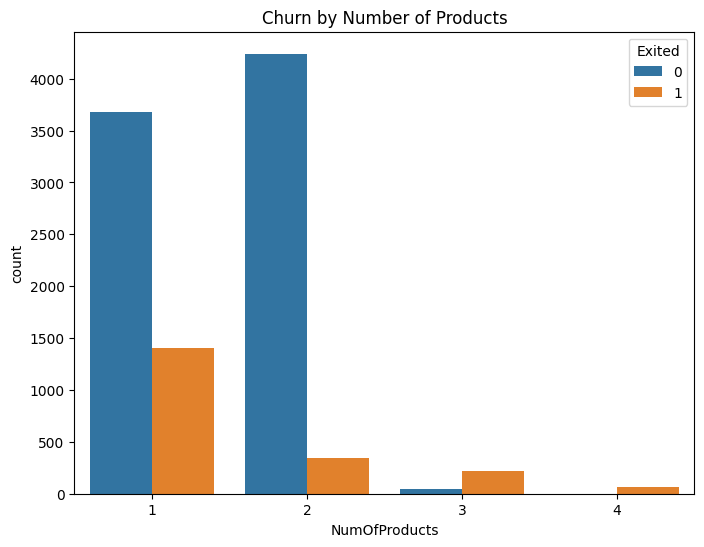

In [28]:
# Churn by Number of Products:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')
plt.show()

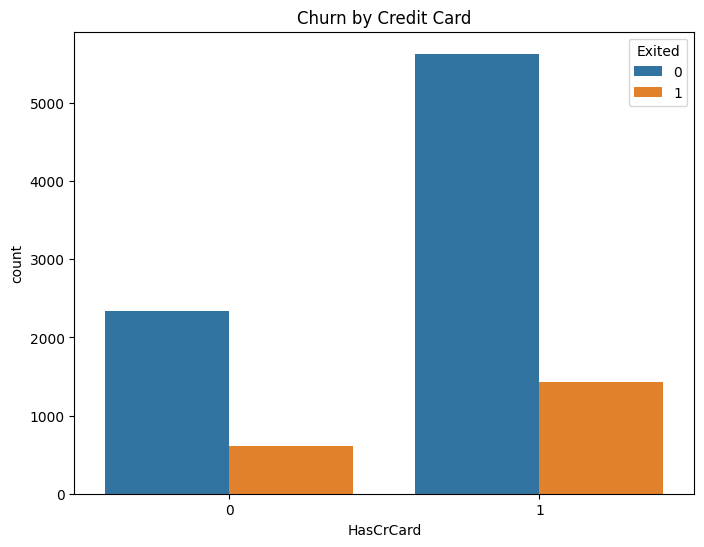

In [29]:
# Churn by Credit Card
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by Credit Card')
plt.show()

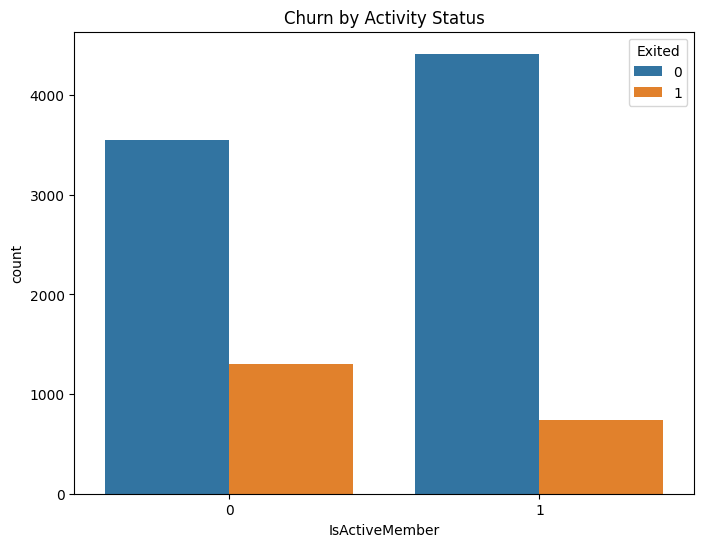

In [30]:
# Churn by Activity Status
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')
plt.show()

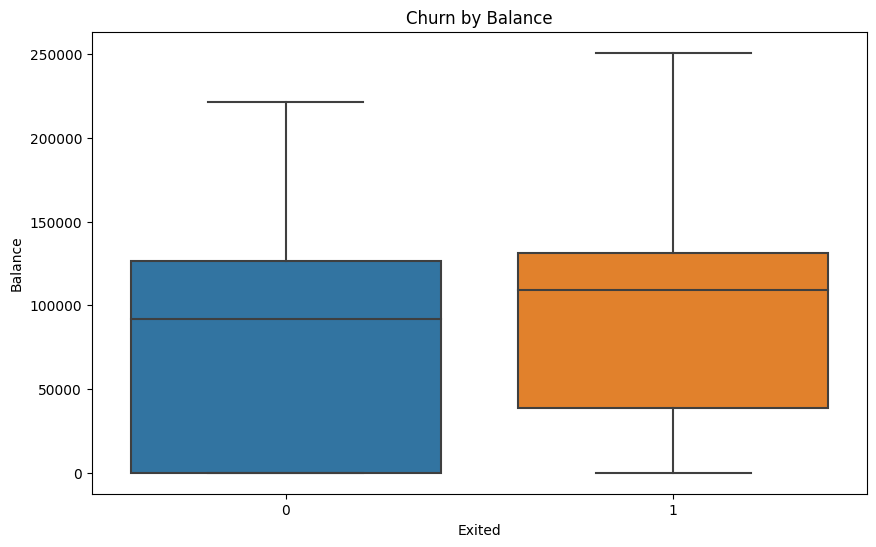

In [31]:
# Churn by Balance:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Churn by Balance')
plt.show()

## **EDA Insights**
Gender and Churn:
The churn rate is higher for female customers (25.1%) compared to male customers (16.5%). This indicates that gender may play a role in customer churn, with female customers being more likely to churn.

Geography and Churn:

The churn rate varies across different countries. Germany has the highest churn rate (32.4%), followed by Spain (16.7%) and France (16.2%). This suggests that geographic location may impact customer churn, with customers in certain countries more prone to churn.

Age Group and Churn:

Age group strongly influences churn rate. The highest churn rate is observed in the 50-60 age group (56.2%), followed by the 40-50 age group (33.9%). The lowest churn rate is observed in the <30 age group (7.5%). This implies that older customers are more likely to churn, while younger customers are more likely to stay with the bank.

Number of Products and Churn:

The number of products held by customers can impact churn. Customers with fewer products may be less likely to churn, while those with more products may have a higher churn rate. Further analysis is required to understand the specific relationship.

Credit Card and Churn:

Having a credit card does not seem to have a significant impact on customer churn. The churn rate appears similar for customers with and without a credit card. Therefore, credit card ownership alone may not be a strong indicator of churn.

Activity Status and Churn:

Customer activity status is another important factor. Active members appear to have a lower churn rate compared to inactive members. This suggests that engaged and active customers are more likely to stay with the bank.

Balance and Churn:

The distribution of account balances does not show a clear distinction between churned and retained customers. Further analysis and feature engineering may be required to explore the relationship between balance and churn in more detail.

To gain deeper insights, We can perform more in-depth analysis, feature engineering, and predictive modeling using appropriate techniques and algorithms.